In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
import numpy as np
from box import Box

In [2]:
with open('../src/conf/config.yaml') as f:
    cfg = Box.from_yaml(f.read())

In [3]:
cfg.target_variable

'314FT010.PNT'

#### Load Data

In [4]:
df_path = cfg.path.processed_data
df = pd.read_csv(df_path, parse_dates=['Timestamp'], index_col=0)

In [5]:
# move the target variable to the first of the dataframe
df = df[[cfg.target_variable] + [col for col in df.columns if col != cfg.target_variable]]

In [6]:
df.head()

,314FT010.PNT,314T109.PNT,314L804.PNT,314LT810.PNT,314T003.PNT,314T157.PNT,315T028.PNT,311T012.PNT,311PZ202.PNT,314P182.PNT,...,311Q750HIC4.PNT,314T967.PNT,315Q011.PNT,314FC015.MEAS,314Q030.PNT,311FC030.SPT,3141TTXD1_4.PNT,344TZ012.PNT,314Q044.PNT,344FV026.OUT
Timestamp,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,9872.846517,52.998047,1.549301,64.589844,20.806641,29.453007,29.582031,28.882812,1.640309,7.013008,...,0.562227,125.360107,0.401367,0.0,1.462109,21.301672,532.112081,32.310737,2.029439,-5.0
2020-01-01 01:00:00,9888.568034,52.998047,1.425070,64.867839,20.805664,28.876786,29.582031,28.667969,1.640309,7.004219,...,0.562227,125.364176,0.401367,0.0,1.469775,21.246181,528.475423,30.860799,2.029439,-5.0
2020-01-01 02:00:00,9899.958171,52.998047,1.491602,64.997070,20.873372,28.709212,29.246094,28.625000,1.419244,6.998633,...,0.562227,125.191243,0.401367,0.0,1.468262,21.306395,526.341064,29.578747,2.029439,-5.0
2020-01-01 03:00:00,9883.221354,52.998047,1.773474,64.961263,20.831055,28.491658,29.078125,28.625000,1.419244,7.002031,...,0.562227,124.890137,0.401367,0.0,1.463623,23.083295,525.785411,28.937723,2.029439,-5.0
2020-01-01 04:00:00,9892.548665,52.998047,1.776562,64.830078,20.871745,28.388762,29.078125,28.625000,1.419244,7.001719,...,0.562227,124.698893,0.401367,0.0,1.469727,26.649424,523.483480,28.365378,2.029439,-5.0


In [7]:
df.shape

(24300, 1912)

In [8]:
# select the rows in df where the target variable is larger than 100
df = df[df[cfg.target_variable] > 100]

In [9]:
df.shape

(22816, 1912)

#### Correlation

In [10]:
# calculate the correlation between the target variable and cvs in effective control

#### XGBoost Feature Selection

In [11]:
from xgboost.sklearn import XGBRegressor

In [12]:
df.shape

(22816, 1912)

In [13]:
# check how many columns have the suffix '.MEAS'
len([col for col in df.columns if '.MEAS' in col])

141

In [14]:
new_ctrl_tags_df = pd.read_excel('../data/Control Tags list V4.xlsx')
new_ctrl_tags_df

,Tags,Location,Property,Property2,Description,Units,CV,Priority
0,311FC009.MEAS,Acid Gas Removal Unit,fc,MEAS,LEAN AMINE TO C1101,Calculation aborted,Control,NaN
1,311FC027.MEAS,Acid Gas Removal Unit,fc,MEAS,C1102 REFLUX EX P1102,T/D,Control,NaN
2,311FC018.MEAS,Acid Gas Removal Unit,fc,MEAS,P1101A MIN FLOW,T/D,Control,NaN
3,311FC020.MEAS,Acid Gas Removal Unit,fc,MEAS,P1101B MIN FLOW,311FC020.MEAS,Control,High
4,311FC030.MEAS,Acid Gas Removal Unit,fc,MEAS,MAKEUP WATER TO V1102,T/D,Control,NaN
...,...,...,...,...,...,...,...,...
141,315FC026.MEAS,Fractionation Unit,fc,MEAS,PROPANE TO UNIT 2600,T/D,Product,NaN
142,315FC750.MEAS,Fractionation Unit,fc,MEAS,P1560A/B DISCH TO E3708,T/D,Product,NaN
143,315FC031.MEAS,Fractionation Unit,fc,MEAS,BUTANE FROM P1570A/B,T/D,Product,NaN
144,315FC751.MEAS,Fractionation Unit,fc,MEAS,P1570A/B DISCH TO E3703,T/D,Product,NaN


In [15]:
# get the first 128 Tag names
new_ctrl_tags = new_ctrl_tags_df.iloc[:128, 0].tolist()
new_ctrl_tags

['311FC009.MEAS',
 '311FC027.MEAS',
 '311FC018.MEAS',
 '311FC020.MEAS',
 '311FC030.MEAS',
 '311LC013.MEAS',
 '311LC003.MEAS',
 '311LC019.MEAS',
 '311LC021.MEAS',
 '311LC005.MEAS',
 '311PC008.MEAS',
 '311PC017.MEAS',
 '311TC015.MEAS',
 '311TC026.MEAS',
 '311TC002.MEAS',
 '312FC001.MEAS',
 '312LC002.MEAS',
 '312LC005.MEAS',
 '312LC008.MEAS',
 '312LC013.MEAS',
 '312PC010.MEAS',
 '312PC011.MEAS',
 '312PC020.MEAS',
 '312PC021.MEAS',
 '312TC016.MEAS',
 '314FC005.MEAS',
 '315FC001.MEAS',
 '314FC009.MEAS',
 '315FC004.MEAS',
 '315LC001.MEAS',
 '315PC002.MEAS',
 '315TC003.MEAS',
 '315FC007.MEAS',
 '314FC012.MEAS',
 '314FC015.MEAS',
 '315FC010.MEAS',
 '314FC016.MEAS',
 '314FC018.MEAS',
 '315LC005.MEAS',
 '315PC005.MEAS',
 '315TC014.MEAS',
 '314FC019.MEAS',
 '315FC017.MEAS',
 '315FC019.MEAS',
 '315LC015.MEAS',
 '315PC013.MEAS',
 '315TC005.MEAS',
 '315FC023.MEAS',
 '315LC021.MEAS',
 '315PC018.MEAS',
 '315TC032.MEAS',
 '315FC024.MEAS',
 '315FC025.MEAS',
 '315FC029.MEAS',
 '315LC009.MEAS',
 '315PC009

In [16]:
colored_tags = ['311FC020.MEAS', '311PC017.MEAS', '312PC010.MEAS', '315TC003.MEAS', 
                '315FC025.MEAS', '314TC001.MEAS', '314FC007.MEAS', '314FC750.MEAS', '314PC108.MEAS']

In [34]:
selected_tags = ['311FC020.MEAS',
 '311FRQ003.MEAS',
 '311PC017.MEAS',
 '342LC116.MEAS',
 '312PC010.MEAS',
 '315TC003.MEAS',
 '315FC013.MEAS',
 '315FC021.MEAS',
 '315FC025.MEAS',
 '314TC001.MEAS',
 '314FQ011.MEAS',
 '314PDC037.MEAS',
 '314TC044.MEAS',
 '314FC001.MEAS',
 '314TDC166.MEAS',
 '314PDC863A.MEAS',
 '314LC911.MEAS',
 '314FC007.MEAS',
 '314FC141.MEAS',
 '314FC750.MEAS',
 '314PC108.MEAS']
james_ctrl_tag = ['311FC020.MEAS',
 '314PC108.MEAS',
 '314LC911.MEAS',
 '314TC001.MEAS',
 '312PC010.MEAS',
 '315TC003.MEAS',
 '314PDC863A.MEAS']
# substract james_ctrl_tag from original_colored_tags
original_selected_tags = list(set(selected_tags) - set(james_ctrl_tag))
len(original_selected_tags)

14

In [35]:
effective_new_cvs = [col for col in new_ctrl_tags if col in df.columns]
len(effective_new_cvs)

86

In [36]:
effective_original_selected_cvs = [col for col in original_selected_tags if col in effective_new_cvs]
len(effective_original_selected_cvs)

5

In [48]:
import plotly.express as px
# calculate the correlation between the target variable and cvs in effective_new_cvs, and plot the correlation using plotly bar chart
corr = df[effective_new_cvs + [cfg.target_variable]].corr()[cfg.target_variable].sort_values(ascending=False)
corr = corr.reset_index().rename(columns={'index': 'CVs', cfg.target_variable: 'Correlation'})
corr['Correlation'] = corr['Correlation'].round(2)
# remove the target variable from corr
corr = corr[corr['CVs'] != cfg.target_variable]

fig = px.bar(corr, x='CVs', y='Correlation', color='Correlation', color_continuous_scale='RdBu')
fig.update_layout(title='Correlation between the target variable and cvs')
# set the size of the figure larger, to show all xticks
fig.update_layout(width=1200)
# set the font size of xticks smaller
fig.update_xaxes(tickfont=dict(size=8))
# highlight the colored tags in xticks
fig.update_xaxes(tickmode='array', tickvals=corr['CVs'], ticktext=['<b>' + col + '</b>' if col in colored_tags else col for col in corr['CVs']])
# make the effective_original_selected_cvs font red in xticks
# fig.update_xaxes(tickmode='array', tickvals=corr['CVs'], ticktext=['<font color="red">' + col + '</font>' if col in effective_original_selected_cvs else col for col in corr['CVs']])

# set the y axis range to [-1, 1]
fig.update_yaxes(range=[-1, 1])

# save the figure as html
fig.write_html('../result/correlation_between_target_variable_and_cvs.html')


fig.show()


In [20]:
# check if the new_ctrl_tags are in the df.columns
len([col for col in new_ctrl_tags if col in df.columns])

86

In [35]:
len([col for col in colored_tags if col in df.columns])

9

In [33]:
len([col for col in original_colored_tags if col in df.columns])

14

Round One

In [92]:
X = df.drop(cfg.target_variable,axis=1)
np.random.seed(42)
X['dummy'] = np.random.rand(len(X))
print(X.shape)
X['dummy']

(22816, 1912)


Timestamp
2020-01-01 00:00:00    0.374540
2020-01-01 01:00:00    0.950714
2020-01-01 02:00:00    0.731994
2020-01-01 03:00:00    0.598658
2020-01-01 04:00:00    0.156019
                         ...   
2023-01-31 20:00:00    0.163526
2023-01-31 21:00:00    0.094529
2023-01-31 22:00:00    0.472920
2023-01-31 23:00:00    0.464955
2023-02-01 00:00:00    0.653458
Name: dummy, Length: 22816, dtype: float64

In [93]:
y=df[cfg.target_variable]
y.shape

(22816,)

In [94]:
xgb = XGBRegressor(random_state=123)
xgb.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [95]:
low_cols = X.columns[xgb.feature_importances_ < xgb.feature_importances_[X.columns.get_loc('dummy')]]
print(len(low_cols))

1394


In [96]:
max(xgb.feature_importances_)

0.88734037

In [97]:
print(np.mean(xgb.feature_importances_))

0.0005230125


In [98]:
xgb.feature_importances_[X.columns.get_indexer(['dummy'])[0]]

1.4015241e-06

In [99]:
# scale the feature importances from 0 to 100 using the min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10000000))
scaled_importances = scaler.fit_transform(xgb.feature_importances_.reshape(-1, 1)).reshape(-1)
max(scaled_importances)

10000000.0

In [100]:
# how many columns in effective_new_cvs are in low_cols
len([col for col in effective_new_cvs if col in low_cols])

63

In [101]:
len([col for col in colored_tags if col in low_cols])

4

In [102]:
len([col for col in original_colored_tags if col in low_cols])

0

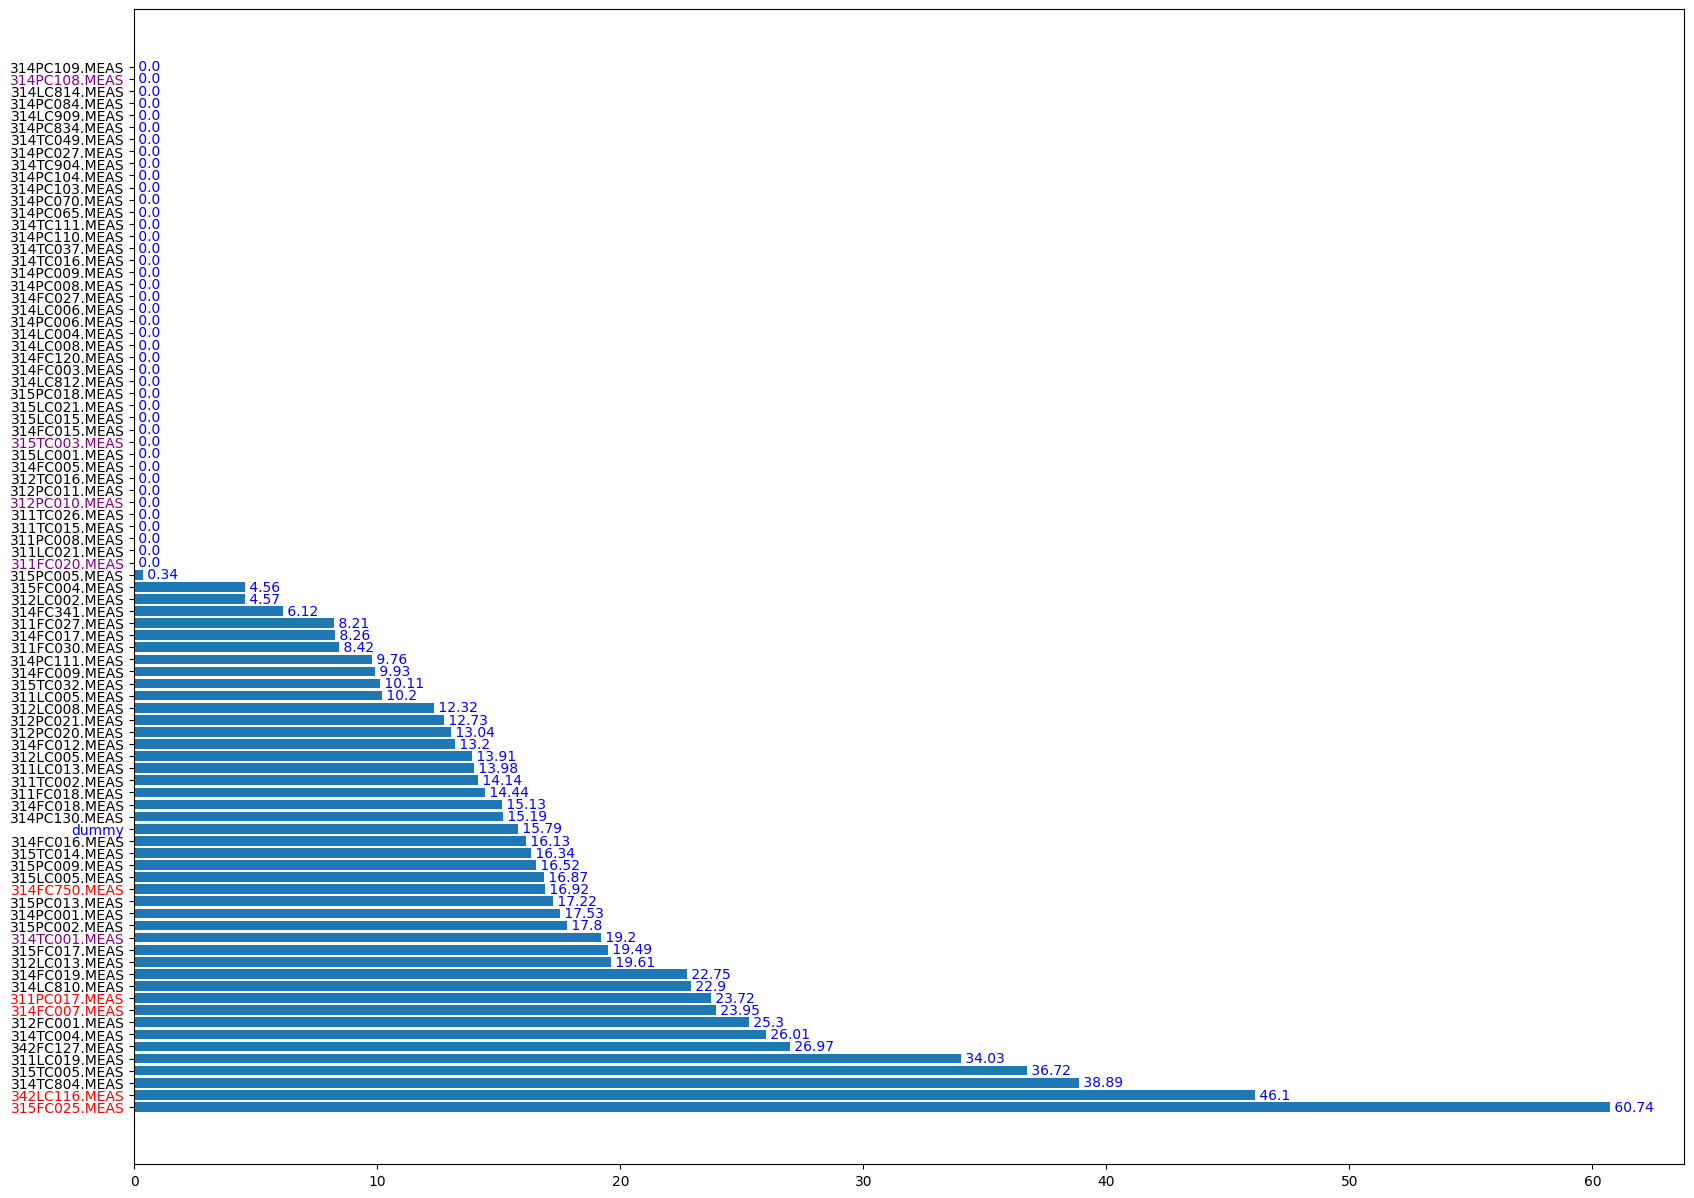

In [109]:
plotted_cols = effective_new_cvs + ['dummy']
# sort the plotted_cols by the feature importance
plotted_cols = sorted(plotted_cols, key=lambda x: scaled_importances[X.columns.get_indexer([x])[0]], reverse=True)
# plot the feature importance for plotted_cols in the sorted order
plt.figure(figsize=(20, 15))
plt.barh(plotted_cols, scaled_importances[X.columns.get_indexer(plotted_cols)])
# print(scaled_importances[X.columns.get_indexer(plotted_cols)])

# Highlight labels
[t.set_color('blue') for t in plt.gca().get_yticklabels() if t.get_text() in ['dummy']]
[t.set_color('purple') for t in plt.gca().get_yticklabels() if t.get_text() in colored_tags]
[t.set_color('red') for t in plt.gca().get_yticklabels() if t.get_text() in original_colored_tags]

# Add y values
for i, v in enumerate(scaled_importances[X.columns.get_indexer(plotted_cols)]):
    plt.text(v, i, " "+str(round(v, 2)), color='blue', va='center')

plt.show()

In [62]:
X.drop(columns=low_cols, inplace=True)
X.shape

(22816, 562)

In [63]:
X.drop(columns='dummy', inplace=True)

Round Two

In [64]:
X['dummy'] = np.random.rand(len(X))

In [65]:
xgb2 = XGBRegressor(random_state=123)
xgb2.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [66]:
low_cols2 = X.columns[xgb2.feature_importances_ < xgb2.feature_importances_[X.columns.get_loc('dummy')]]
print(len(low_cols2))

82


In [67]:
X.drop(columns=low_cols2, inplace=True)
X.shape

(22816, 480)

In [68]:
# check how many features whose suffix is '.MEAS' are in the X
print(len([col for col in X.columns if col.endswith('.MEAS')]))

35


In [69]:
X.drop(columns='dummy', inplace=True)

Round Three

In [70]:
X['dummy'] = np.random.rand(len(X))

In [71]:
xgb3 = XGBRegressor(random_state=123)
xgb3.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=123, ...)

In [72]:
low_cols3 = X.columns[xgb3.feature_importances_ < xgb3.feature_importances_[X.columns.get_loc('dummy')]]
print(len(low_cols3))

106


In [73]:
X.drop(columns=low_cols3, inplace=True)
X.shape

(22816, 374)

In [74]:
len([col for col in X.columns if col.endswith('.MEAS')])

30

In [75]:
X.drop(columns='dummy', inplace=True)

Round Four

In [77]:
X['dummy'] = np.random.rand(len(X))

xgb4 = XGBRegressor(random_state=123)
xgb4.fit(X, y)

low_cols4 = X.columns[xgb4.feature_importances_ < xgb4.feature_importances_[X.columns.get_loc('dummy')]]
print(len(low_cols4))

183


In [78]:
X.drop(columns=low_cols4, inplace=True)
X.shape

(22816, 191)

In [79]:
len([col for col in X.columns if col.endswith('.MEAS')])

14

In [80]:
X.drop(columns='dummy', inplace=True)

#### Add Description & Save Result

In [188]:
# selected tags from a previous run
james_ctrl_tag = ['311FC020.MEAS',
 '314PC108.MEAS',
 '314LC911.MEAS',
 '314TC001.MEAS',
 '312PC010.MEAS',
 '315TC003.MEAS',
 '314PDC863A.MEAS']

In [190]:
selected_feats = X.columns.tolist() + james_ctrl_tag
len(selected_feats)

197

In [191]:
df_tags = pd.read_excel(cfg.path.tags_info, sheet_name="T3_all_tags2")
df_tags.head()

,Full Tags,Assets1,Assets,Locn,Location,Tags,Column1,Property,Description,Units,Digital (States)\n
0,311U200_GW2:311UZ200U10.CIN,311U200_GW2,311U200,3-1100,Acid Gas Removal Unit,311UZ200U10.CIN,uz,CIN,TRAIN SHUTDN 11UZ200,,N_OPENOPEN
1,311U200_GW2:311UZ200U12.CIN,311U200_GW2,311U200,3-1100,Acid Gas Removal Unit,311UZ200U12.CIN,uz,CIN,TRAIN SHUTDN 11UZ200,,N_OPENOPEN
2,311U200_GW2:311UZ200U13.CIN,311U200_GW2,311U200,3-1100,Acid Gas Removal Unit,311UZ200U13.CIN,uz,CIN,TRAIN SHUTDN 11UZ200,,N_OPENOPEN
3,311U200_GW2:311UZ200U21.CIN,311U200_GW2,311U200,3-1100,Acid Gas Removal Unit,311UZ200U21.CIN,uz,CIN,TRAIN SHUTDN 11UZ200,,N_OPENOPEN
4,311U200_GW2:311UZ200U22.CIN,311U200_GW2,311U200,3-1100,Acid Gas Removal Unit,311UZ200U22.CIN,uz,CIN,TRAIN SHUTDN 11UZ200,,N_OPENOPEN


In [192]:
df_tags.shape

(3120, 11)

In [193]:
# select the rows in df_tags where the tag is in selected_feats
selected_tags = df_tags[df_tags['Tags'].isin(selected_feats)]
selected_tags.head()

,Full Tags,Assets1,Assets,Locn,Location,Tags,Column1,Property,Description,Units,Digital (States)\n
19,3C1101_1:311F005A.PNT,3C1101_1,3C1101,3-1100,Acid Gas Removal Unit,311F005A.PNT,f,PNT,C1101 GAS INLET,T/D,
21,3C1101_1:311F005B.PNT,3C1101_1,3C1101,3-1100,Acid Gas Removal Unit,311F005B.PNT,f,PNT,C1101 GAS INLET,T/D,
23,3S1151_1:311F058.PNT,3S1151_1,3S1151,3-1100,Acid Gas Removal Unit,311F058.PNT,f,PNT,S1151 AMINE FILTER OUTLET,T/D,
25,3V1101_1:311F003A.PNT,3V1101_1,3V1101,3-1100,Acid Gas Removal Unit,311F003A.PNT,f,PNT,U1100 GAS IN TO V1101,T/D,
26,3V1101_1:311F003B.PNT,3V1101_1,3V1101,3-1100,Acid Gas Removal Unit,311F003B.PNT,f,PNT,U1100 GAS IN TO V1101,T/D,


In [194]:
# move Tags to the first of the selected_tags dataframe
selected_tags = selected_tags[['Tags'] + [col for col in selected_tags.columns if col != 'Tags']]
selected_tags.head()

,Tags,Full Tags,Assets1,Assets,Locn,Location,Column1,Property,Description,Units,Digital (States)\n
19,311F005A.PNT,3C1101_1:311F005A.PNT,3C1101_1,3C1101,3-1100,Acid Gas Removal Unit,f,PNT,C1101 GAS INLET,T/D,
21,311F005B.PNT,3C1101_1:311F005B.PNT,3C1101_1,3C1101,3-1100,Acid Gas Removal Unit,f,PNT,C1101 GAS INLET,T/D,
23,311F058.PNT,3S1151_1:311F058.PNT,3S1151_1,3S1151,3-1100,Acid Gas Removal Unit,f,PNT,S1151 AMINE FILTER OUTLET,T/D,
25,311F003A.PNT,3V1101_1:311F003A.PNT,3V1101_1,3V1101,3-1100,Acid Gas Removal Unit,f,PNT,U1100 GAS IN TO V1101,T/D,
26,311F003B.PNT,3V1101_1:311F003B.PNT,3V1101_1,3V1101,3-1100,Acid Gas Removal Unit,f,PNT,U1100 GAS IN TO V1101,T/D,


In [195]:
# find MEAS/Controllable tags
MEAS_tags = selected_tags[selected_tags['Tags'].str.endswith('.MEAS')]['Tags'].tolist()
MEAS_tags

['311FC020.MEAS',
 '311FRQ003.MEAS',
 '311PC017.MEAS',
 '342LC116.MEAS',
 '312PC010.MEAS',
 '315TC003.MEAS',
 '315FC013.MEAS',
 '315FC021.MEAS',
 '315FC025.MEAS',
 '314TC001.MEAS',
 '314FQ011.MEAS',
 '314PDC037.MEAS',
 '314TC044.MEAS',
 '314FC001.MEAS',
 '314TDC166.MEAS',
 '314PDC863A.MEAS',
 '314LC911.MEAS',
 '314FC007.MEAS',
 '314FC141.MEAS',
 '314FC750.MEAS',
 '314PC108.MEAS']

In [196]:
# move MEAS_tags rows to the top of the selected_tags dataframe, and remaining rows to the bottom
MEAS_rows = selected_tags[selected_tags['Tags'].isin(MEAS_tags)]
other_rows = selected_tags[~selected_tags['Tags'].isin(MEAS_tags)]
# combine the two dataframes
selected_tags = pd.concat([MEAS_rows, other_rows])
selected_tags.head()

,Tags,Full Tags,Assets1,Assets,Locn,Location,Column1,Property,Description,Units,Digital (States)\n
37,311FC020.MEAS,3P1101_2:311FC020.MEAS,3P1101_2,3P1101,3-1100,Acid Gas Removal Unit,fc,MEAS,P1101B MIN FLOW,T/D,
49,311FRQ003.MEAS,3V1101_1:311FRQ003.MEAS,3V1101_1,3V1101,3-1100,Acid Gas Removal Unit,frq,MEAS,COMP U1100 GAS IN TO V1101,T/D,
170,311PC017.MEAS,3V1102_2:311PC017.MEAS,3V1102_2,3V1102,3-1100,Acid Gas Removal Unit,pc,MEAS,V1102 GAS OUTLET TO ATM,BAR G,
273,342LC116.MEAS,3E4201_2:342LC116.MEAS,3E4201_2,3E4201,3-4200,Cooling Water System,lc,MEAS,A4201 CW BASIN,%,
639,312PC010.MEAS,3V1202_2:312PC010.MEAS,3V1202_2,3V1202,3-1200,Dehydration Unit,pc,MEAS,V1202 3 PHASE SEP,BAR G,


In [197]:
selected_tags.shape

(197, 11)

In [198]:
# reset the index of selected_tags
selected_tags.reset_index(drop=True, inplace=True)
selected_tags.head()

,Tags,Full Tags,Assets1,Assets,Locn,Location,Column1,Property,Description,Units,Digital (States)\n
0,311FC020.MEAS,3P1101_2:311FC020.MEAS,3P1101_2,3P1101,3-1100,Acid Gas Removal Unit,fc,MEAS,P1101B MIN FLOW,T/D,
1,311FRQ003.MEAS,3V1101_1:311FRQ003.MEAS,3V1101_1,3V1101,3-1100,Acid Gas Removal Unit,frq,MEAS,COMP U1100 GAS IN TO V1101,T/D,
2,311PC017.MEAS,3V1102_2:311PC017.MEAS,3V1102_2,3V1102,3-1100,Acid Gas Removal Unit,pc,MEAS,V1102 GAS OUTLET TO ATM,BAR G,
3,342LC116.MEAS,3E4201_2:342LC116.MEAS,3E4201_2,3E4201,3-4200,Cooling Water System,lc,MEAS,A4201 CW BASIN,%,
4,312PC010.MEAS,3V1202_2:312PC010.MEAS,3V1202_2,3V1202,3-1200,Dehydration Unit,pc,MEAS,V1202 3 PHASE SEP,BAR G,


In [199]:
selected_tags.to_csv(cfg.path.selected_tags, index=False)

#### Get Min & Max of the CVs

In [203]:
# create a new dataframe with MEAS_tags as rows, two columns: Min, Max
cv_df = pd.DataFrame(MEAS_tags, columns=['Tags'])
cv_df['Min'] = np.nan
cv_df['Max'] = np.nan
cv_df

,Tags,Min,Max
0,311FC020.MEAS,NaN,NaN
1,311FRQ003.MEAS,NaN,NaN
2,311PC017.MEAS,NaN,NaN
3,342LC116.MEAS,NaN,NaN
4,312PC010.MEAS,NaN,NaN
5,315TC003.MEAS,NaN,NaN
6,315FC013.MEAS,NaN,NaN
7,315FC021.MEAS,NaN,NaN
8,315FC025.MEAS,NaN,NaN
9,314TC001.MEAS,NaN,NaN


In [214]:
# for each tag in cv_df, Min is the minimum value of the tag in df, Max is the maximum value of the tag in df
for tag in cv_df['Tags']:
    cv_df.loc[cv_df['Tags'] == tag, 'Min'] = df[tag].quantile(0.05)
    cv_df.loc[cv_df['Tags'] == tag, 'Max'] = df[tag].quantile(0.95)
cv_df

,Tags,Min,Max
0,311FC020.MEAS,0.000000,5095.601257
1,311FRQ003.MEAS,5450.796468,11172.563232
2,311PC017.MEAS,0.600506,0.686156
3,342LC116.MEAS,72.170085,86.019531
4,312PC010.MEAS,14.930074,16.426208
5,315TC003.MEAS,17.937952,46.292253
6,315FC013.MEAS,0.006325,32.353127
7,315FC021.MEAS,-5.686930,0.183203
8,315FC025.MEAS,0.127031,1078.691178
9,314TC001.MEAS,20.957606,22.731193


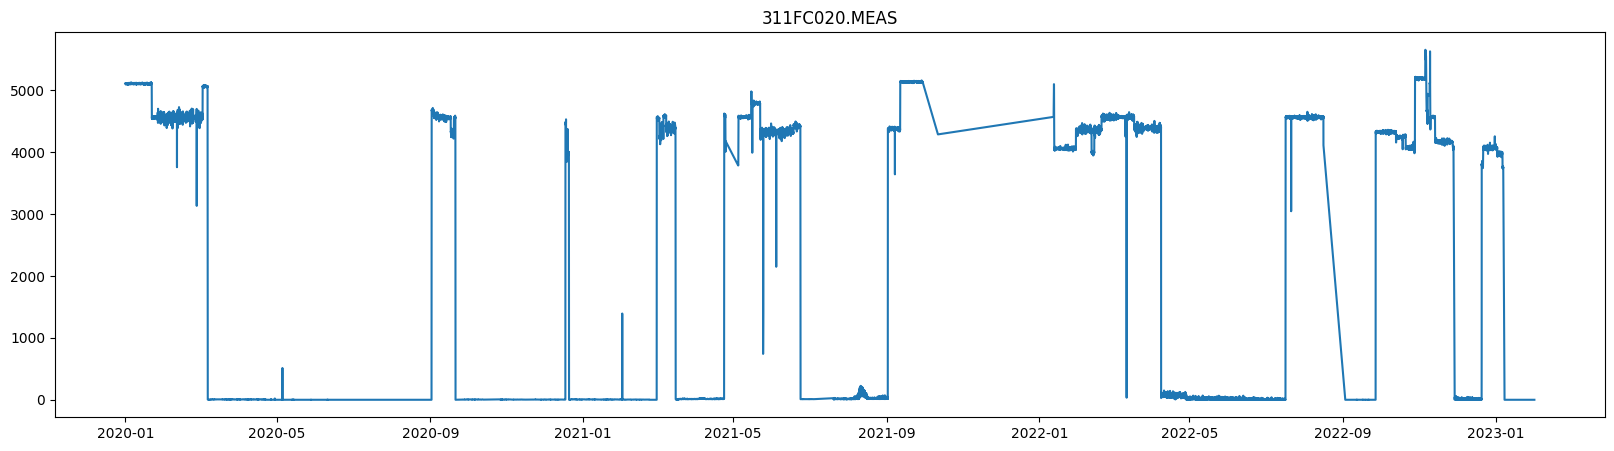

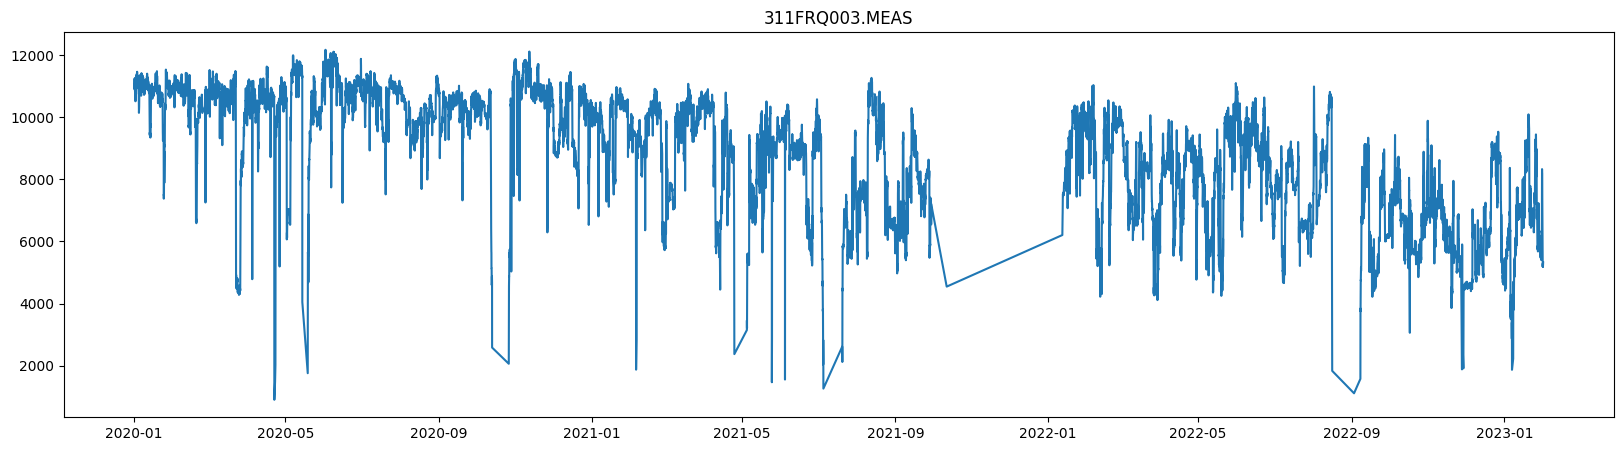

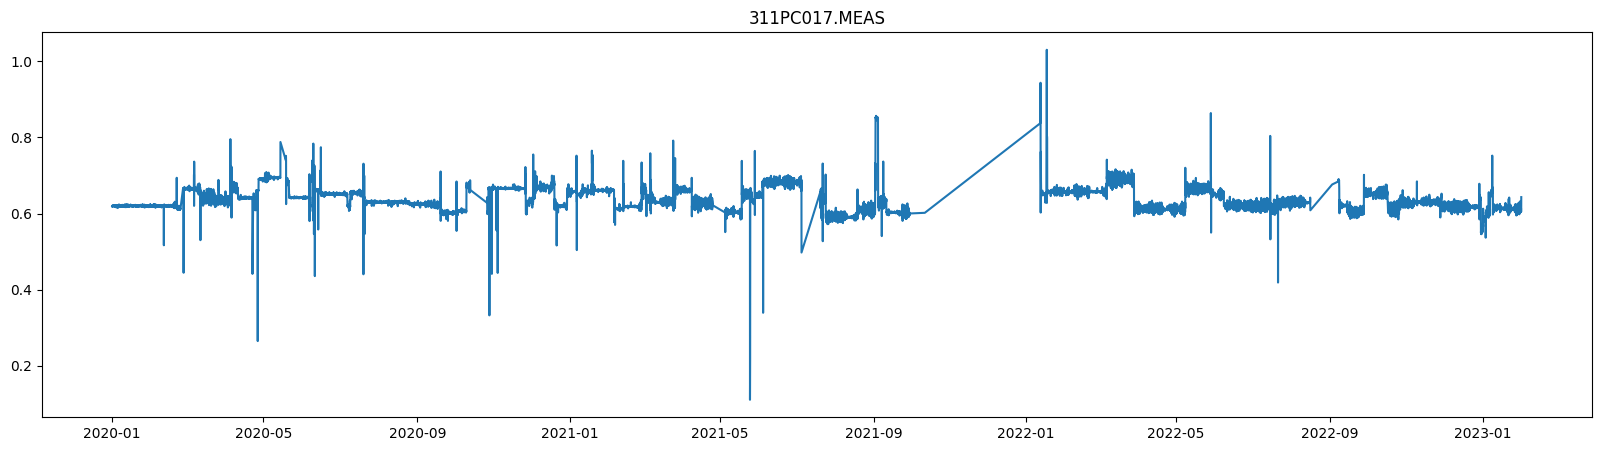

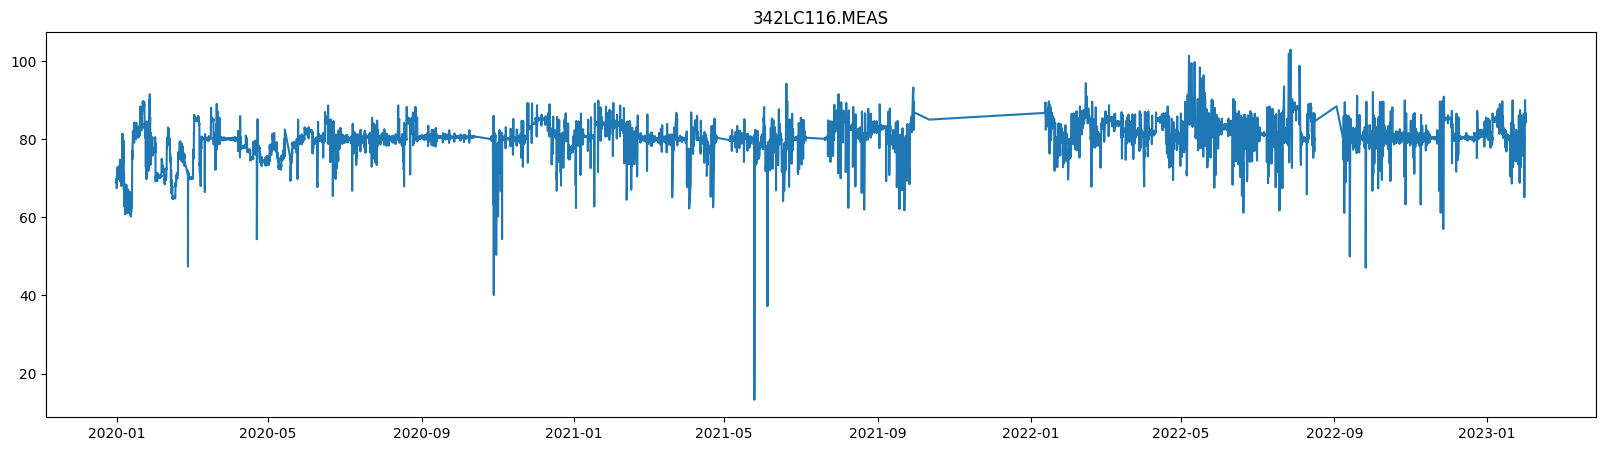

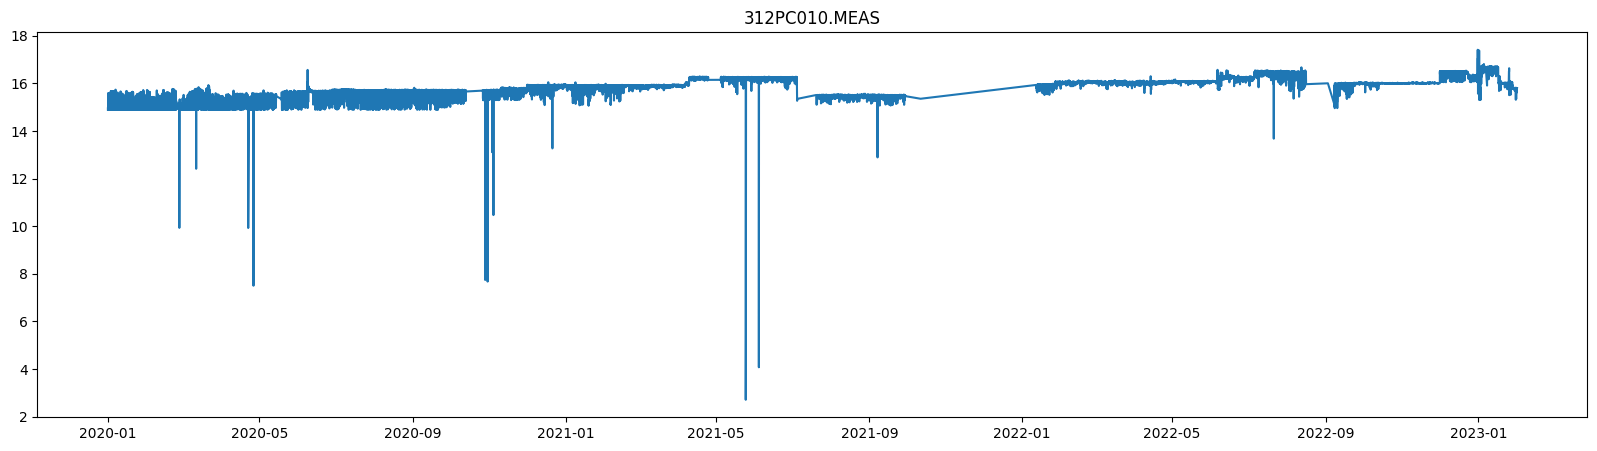

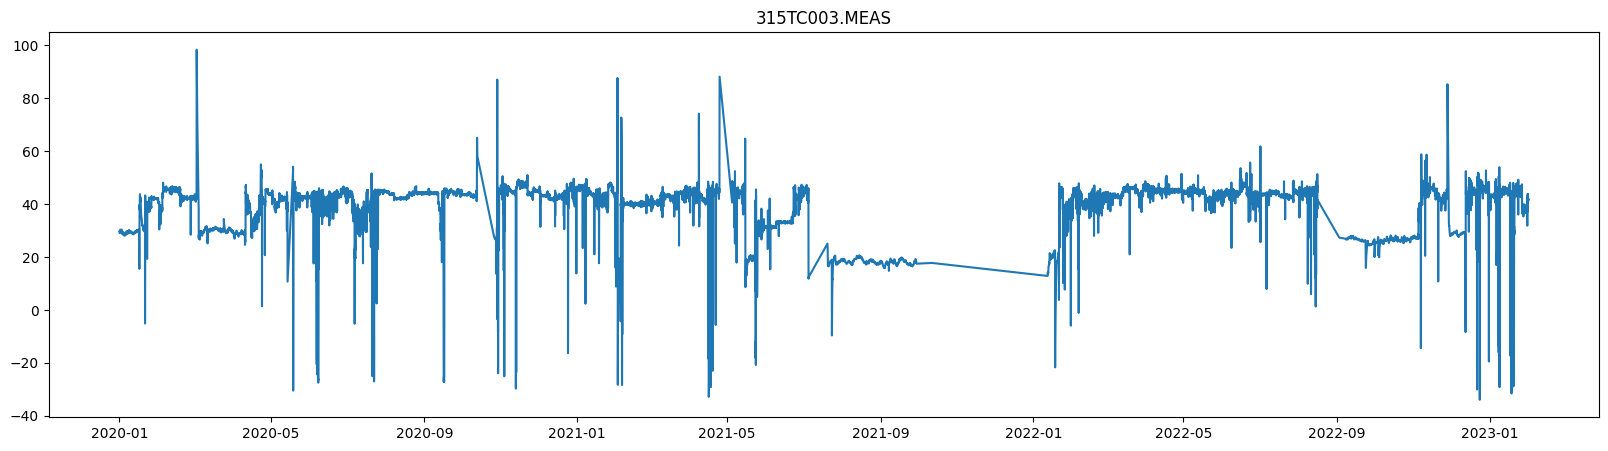

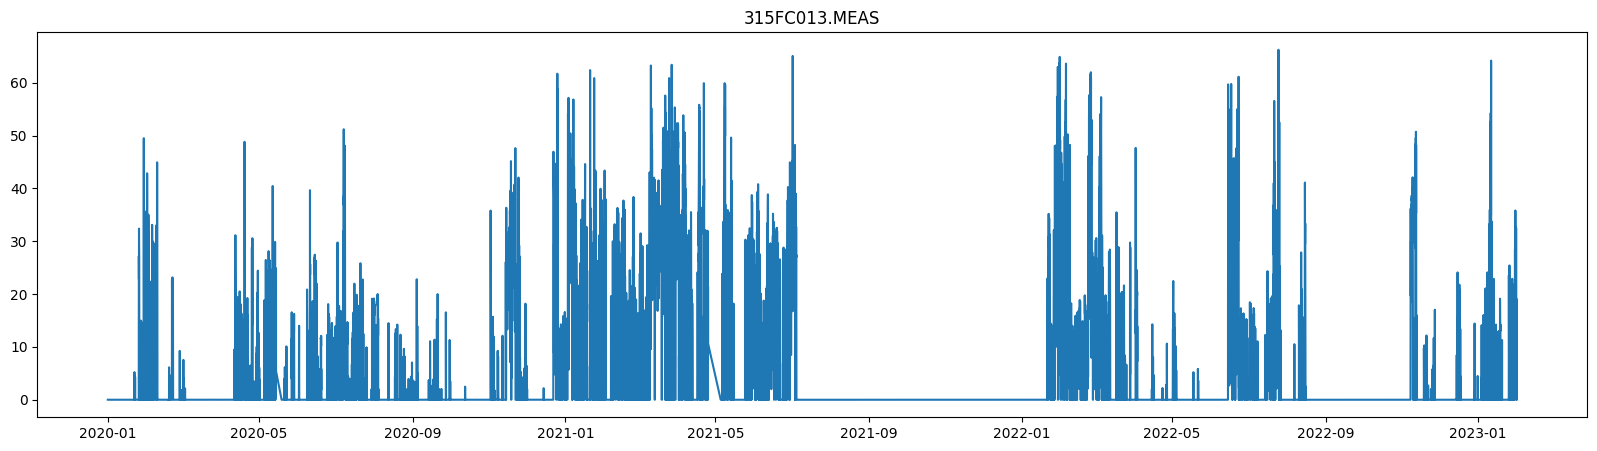

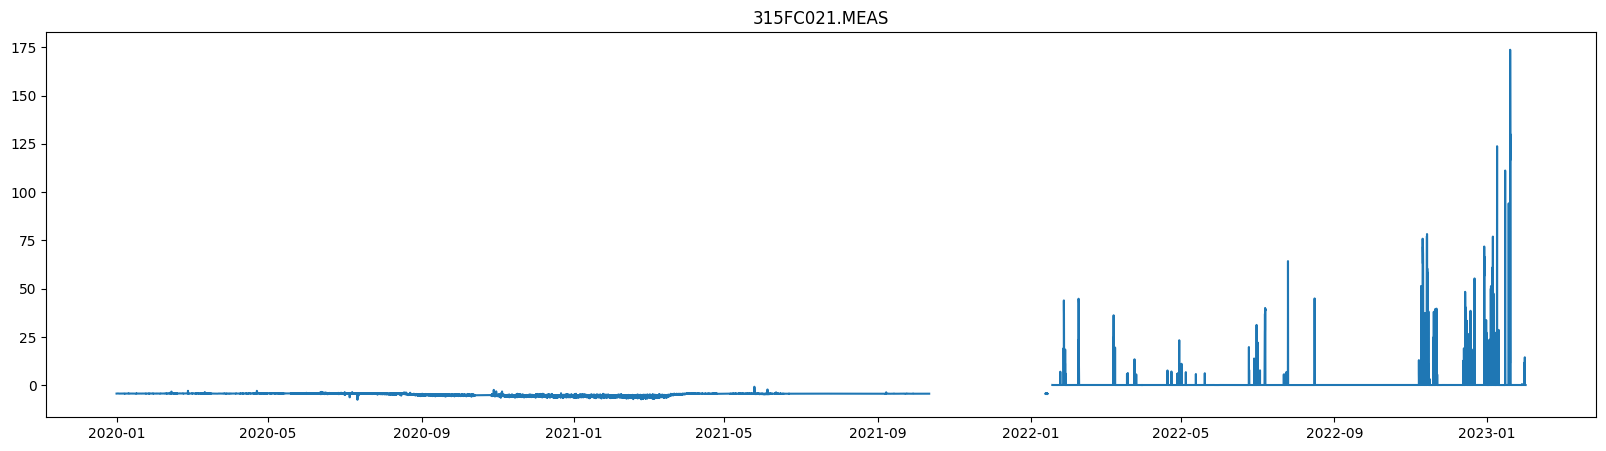

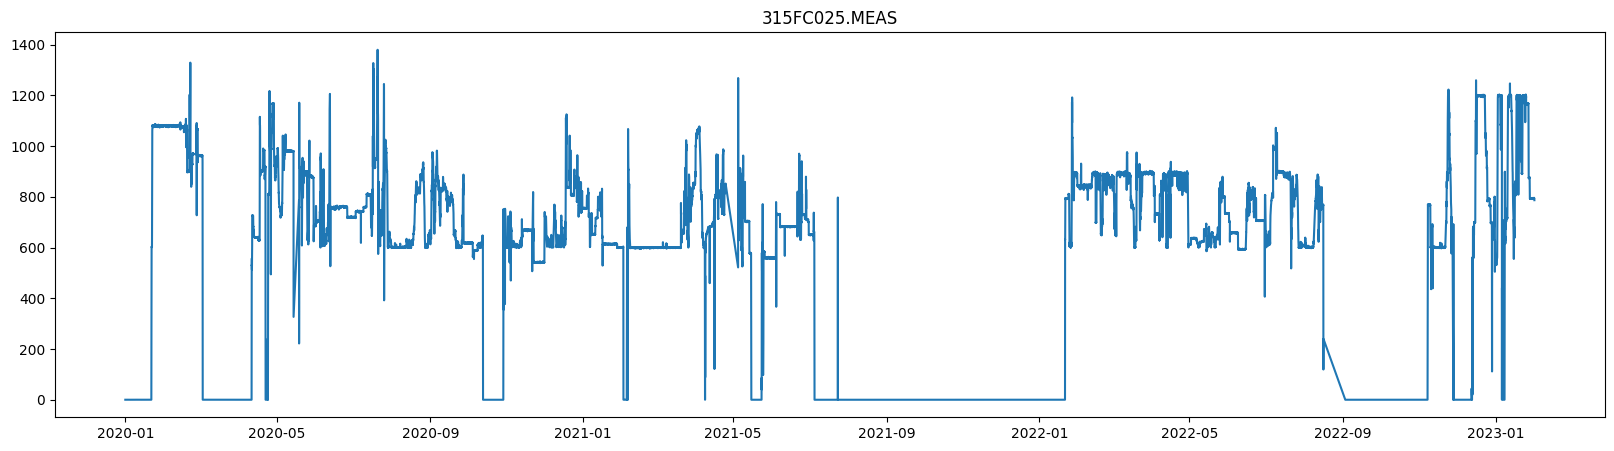

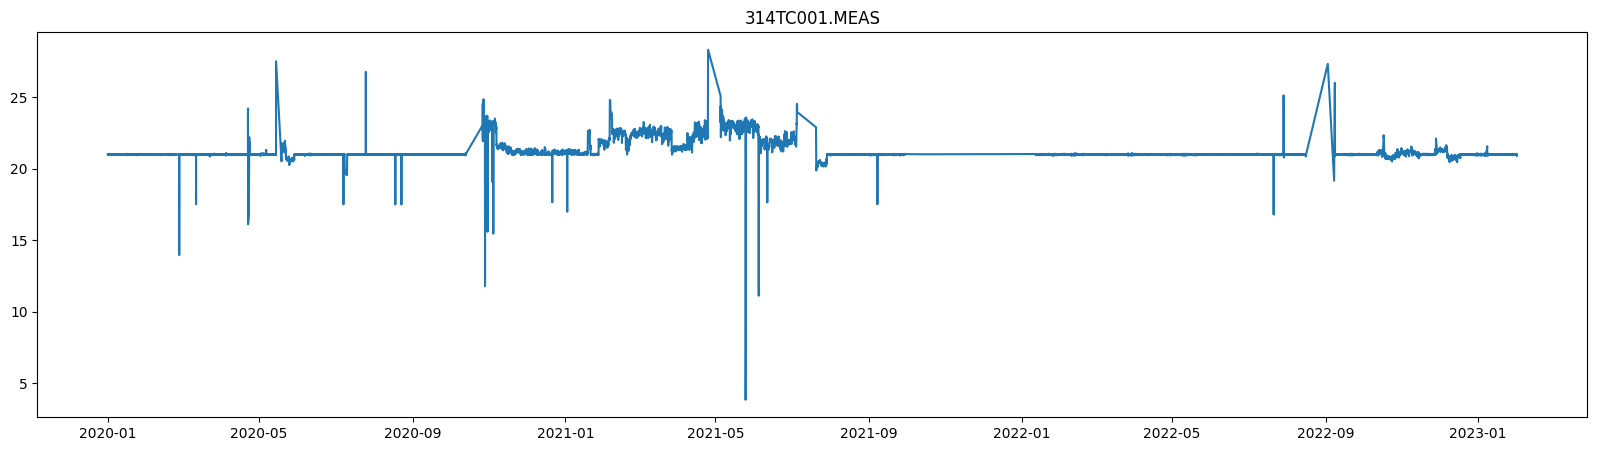

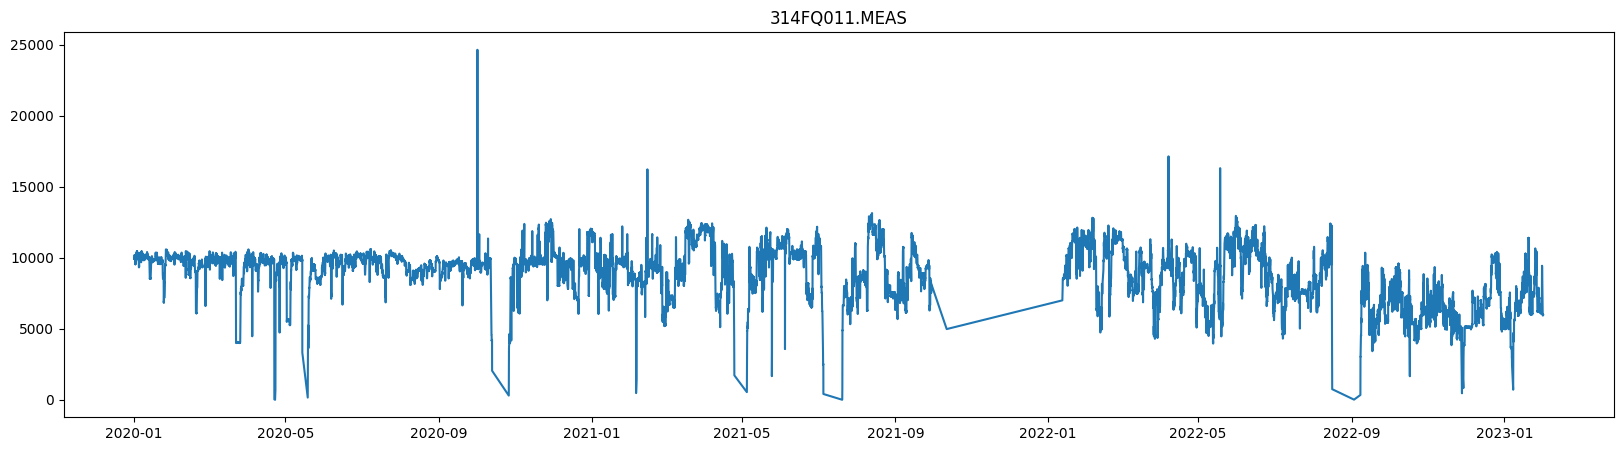

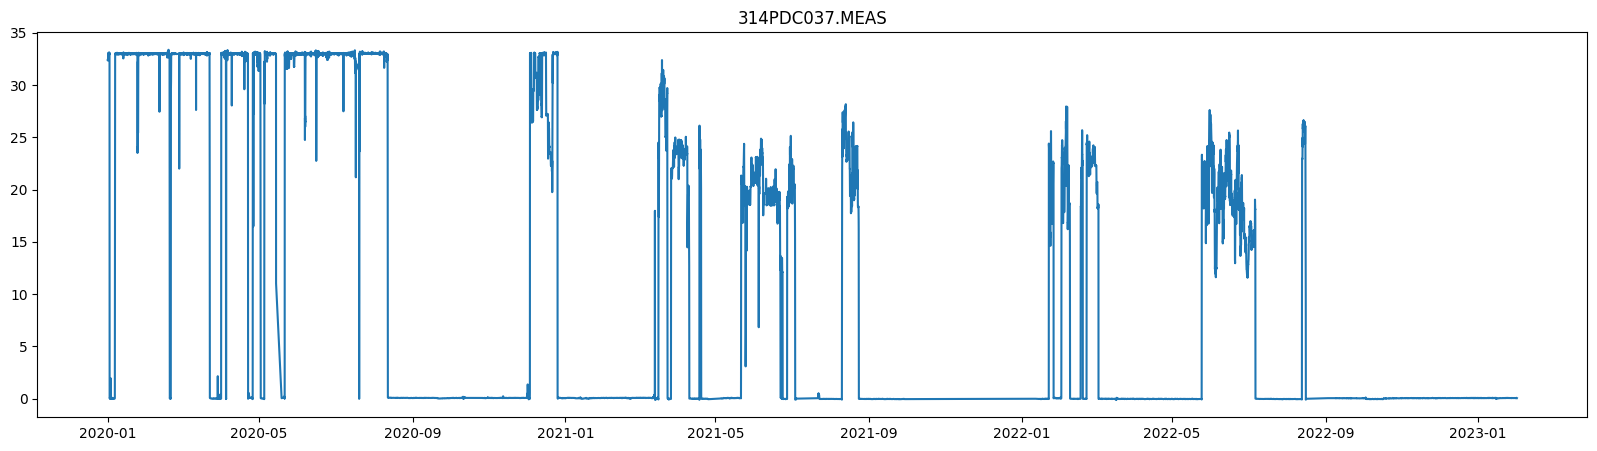

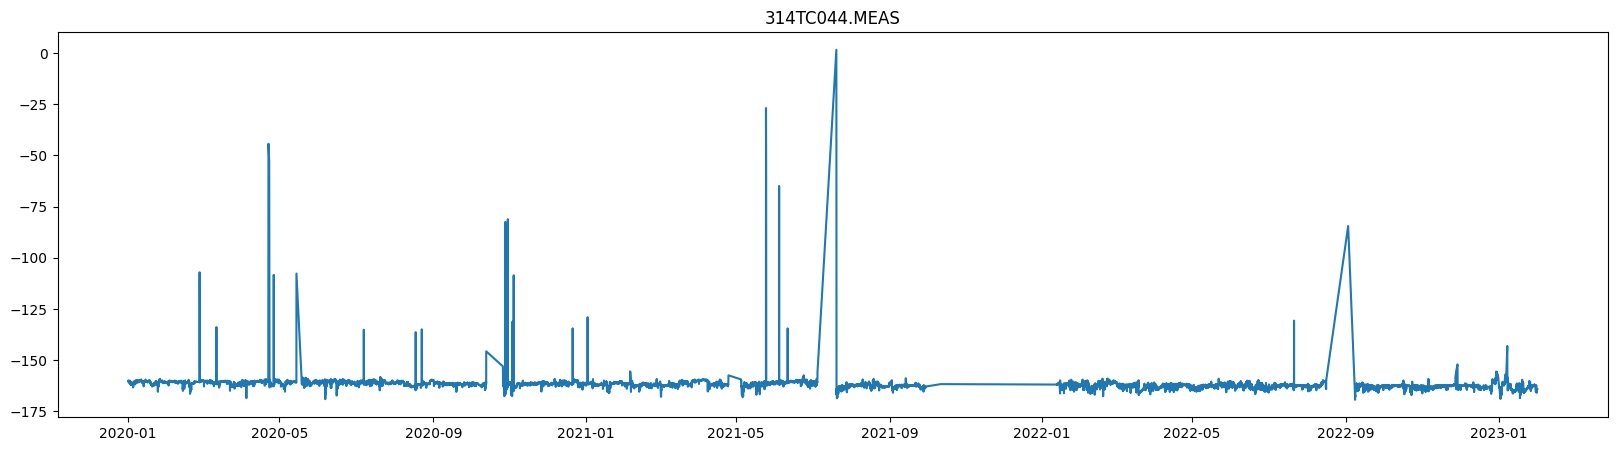

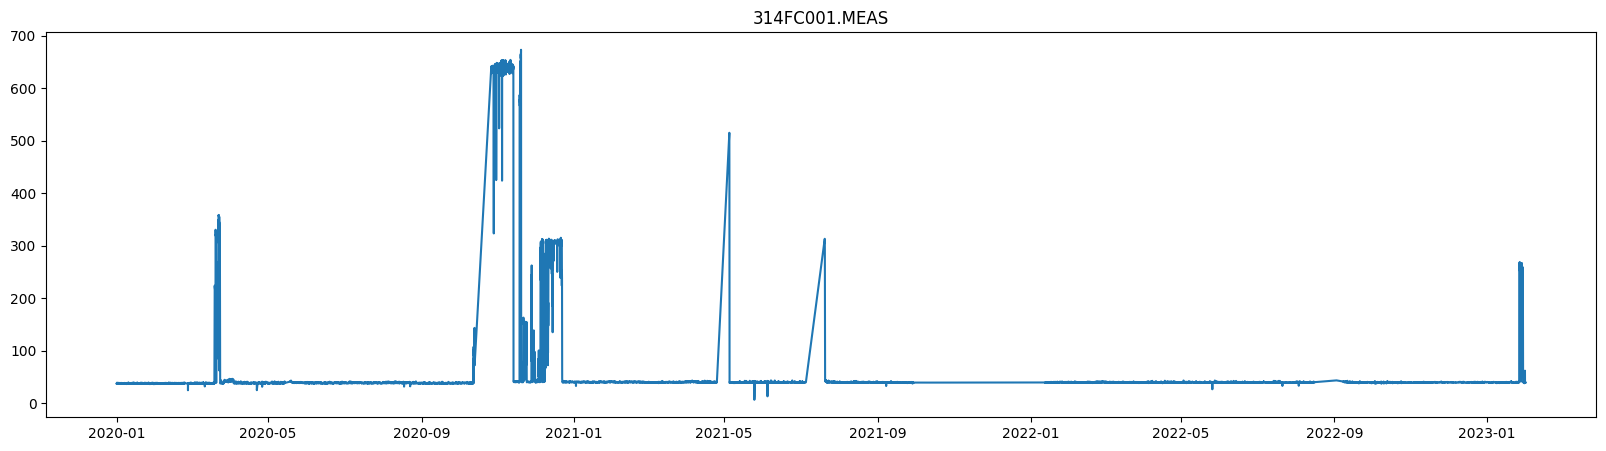

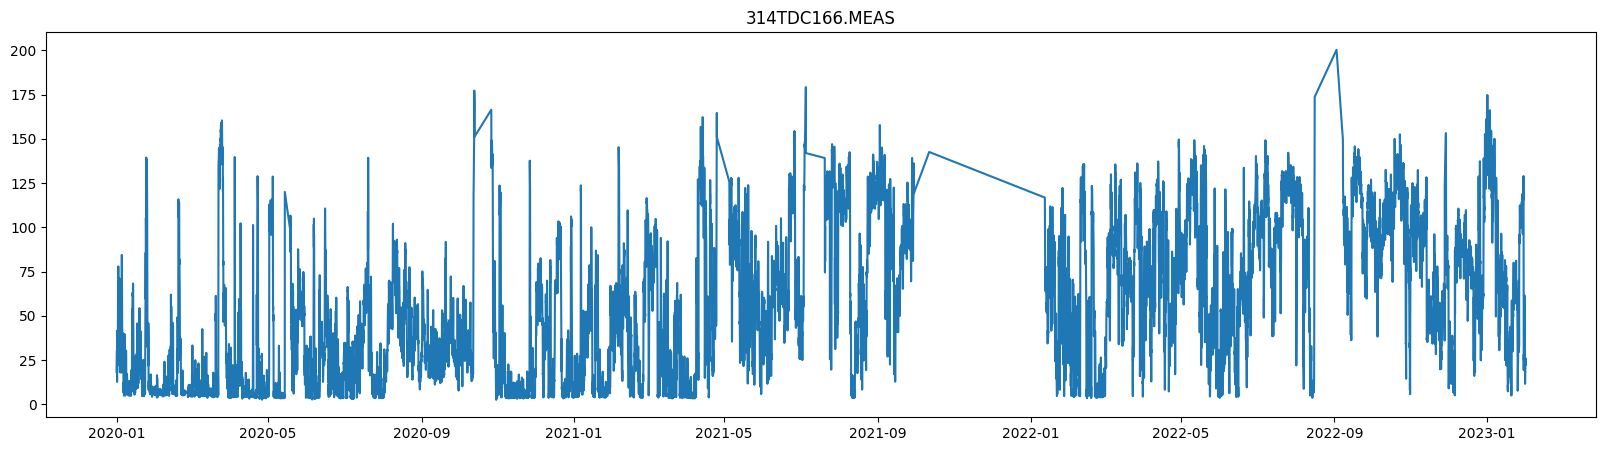

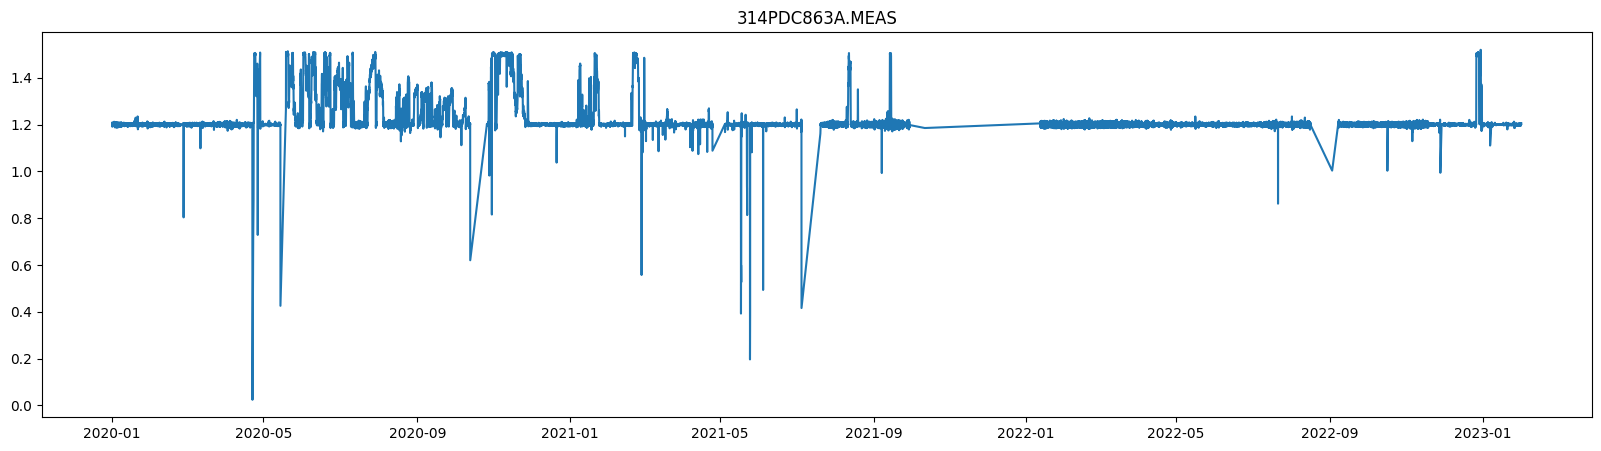

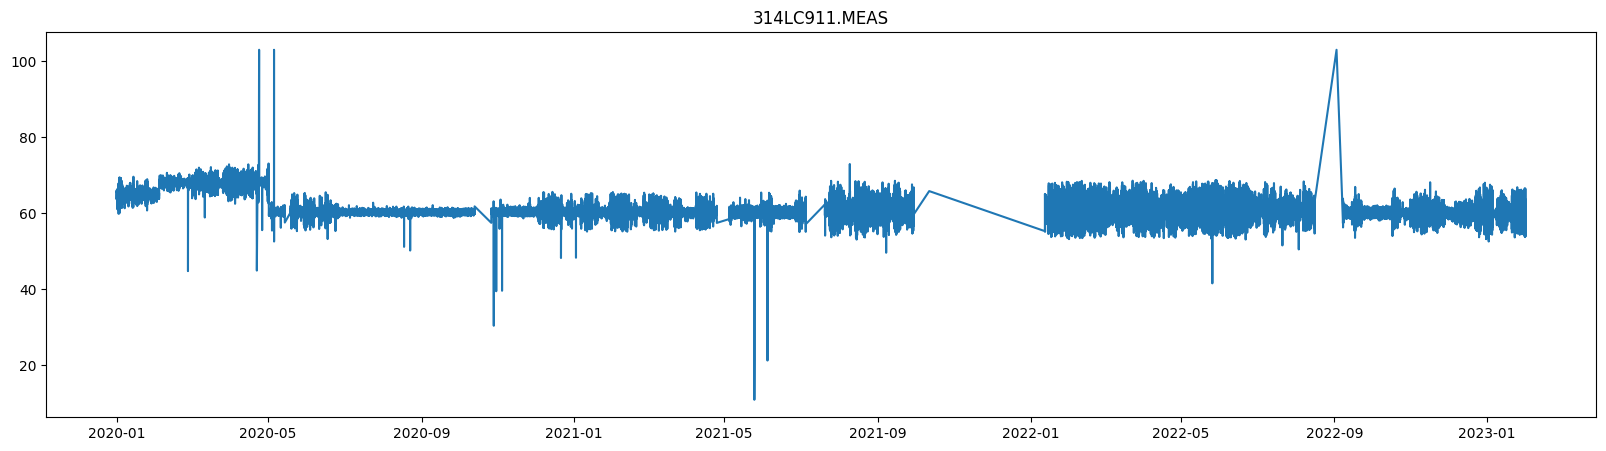

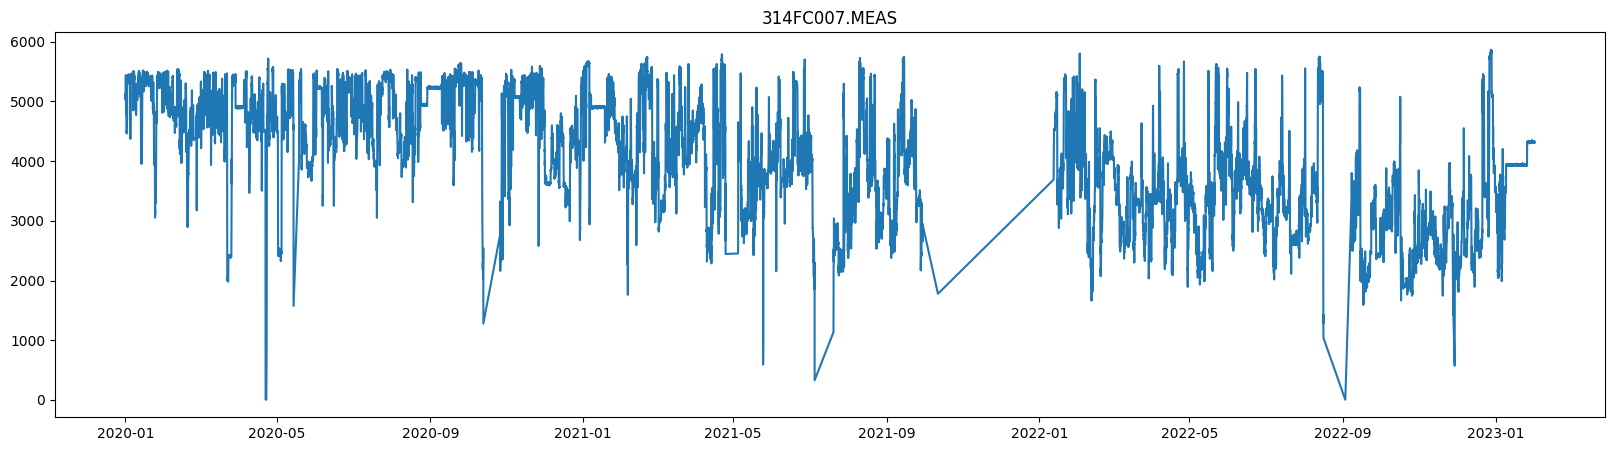

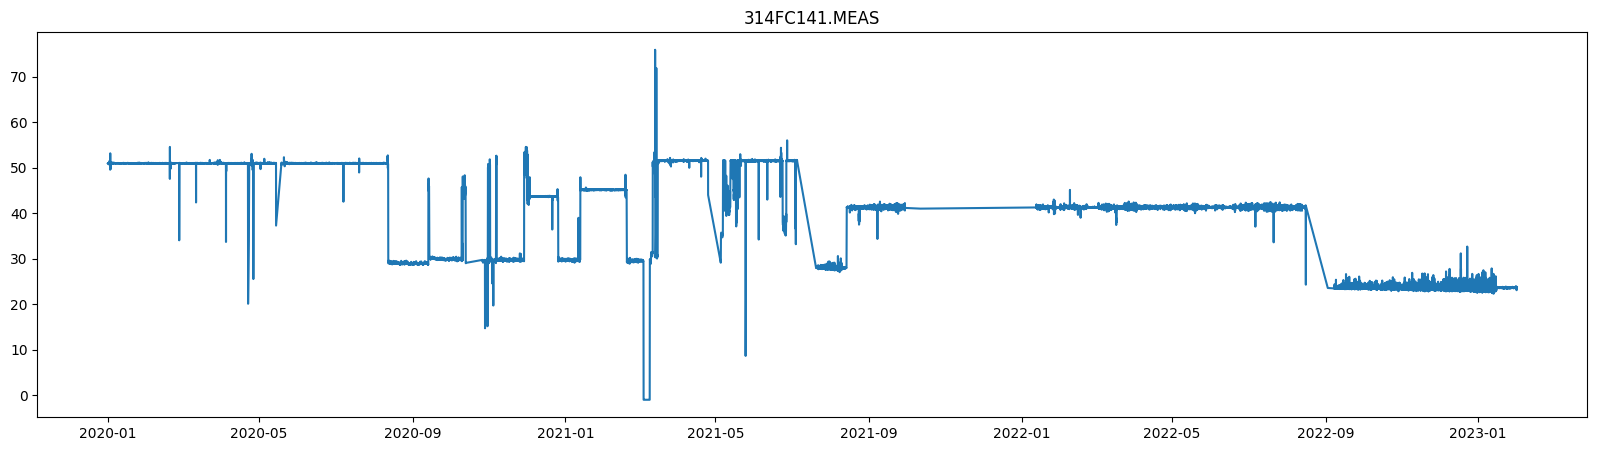

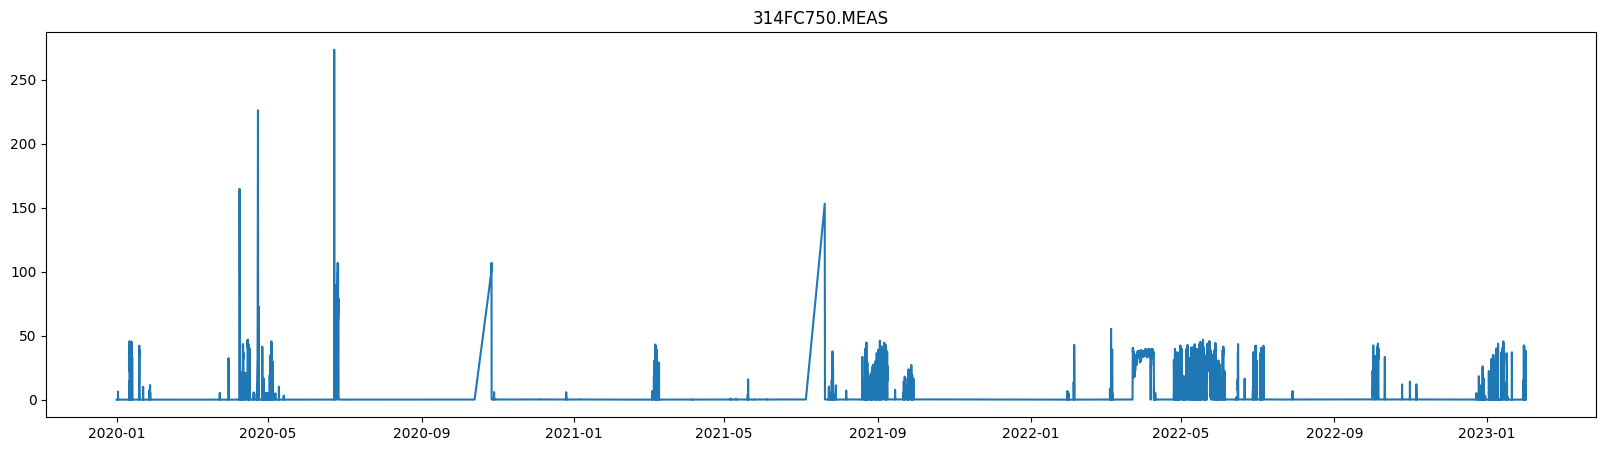

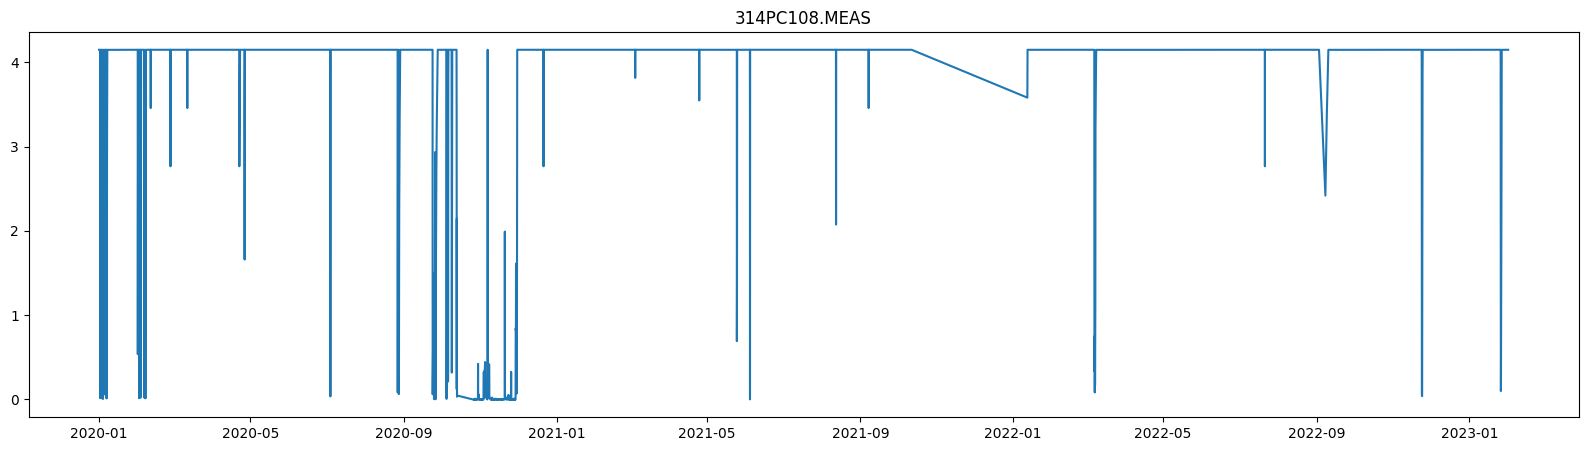

In [213]:
# plot all MEAS_tags one by one
for tag in cv_df['Tags']:
    plt.figure(figsize=(20, 5))
    plt.plot(df[tag])
    plt.title(tag)
    plt.show()
    

In [216]:
# save cv_df to csv
cv_df.to_csv(cfg.path.cv_tags_min_max, index=False)

In [217]:
# There are some gaps, because we dropped some rows in df
df.loc['2022-08-31':].head()

,314FT010.PNT,314T109.PNT,314L804.PNT,314LT810.PNT,314T003.PNT,314T157.PNT,315T028.PNT,311T012.PNT,311PZ202.PNT,314P182.PNT,...,311Q750HIC4.PNT,314T967.PNT,315Q011.PNT,314FC015.MEAS,314Q030.PNT,311FC030.SPT,3141TTXD1_4.PNT,344TZ012.PNT,314Q044.PNT,344FV026.OUT
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-09-02 18:00:00,297.512530,27.233398,1.765075,56.371419,29.862956,27.938956,27.876302,83.552409,1.801107,6.810781,...,1.404620,58.504232,0.004102,0.000000,0.081689,0.0,430.944082,28.548528,85.841801,-5.0
2022-09-07 20:00:00,340.219244,27.089844,1.751783,56.474284,26.823893,27.015826,26.916016,66.878255,1.997400,6.820351,...,0.773854,119.704183,0.003711,23.849540,0.340869,0.0,472.223282,26.785707,8.151817,-5.0
2022-09-07 21:00:00,2399.741333,26.951172,1.740910,56.320312,26.432292,26.586600,26.848307,59.451823,1.933509,6.813398,...,0.773854,120.109049,0.003711,12.526955,0.410791,0.0,525.647227,26.785707,2.104640,-5.0
2022-09-07 22:00:00,3052.404053,26.821615,1.727287,56.382487,25.819336,26.389626,26.669271,51.637695,1.933509,6.807226,...,0.773854,120.760091,0.003711,1.951207,0.476465,0.0,545.659159,26.785707,1.512932,-5.0
2022-09-07 23:00:00,3039.248454,26.671875,1.718225,56.415039,26.313477,26.307309,26.507161,51.749349,1.933509,6.809609,...,0.773854,121.087646,0.003711,0.000000,0.569434,0.0,529.522034,26.785707,1.959828,-5.0
